<a href="https://colab.research.google.com/github/gittEze/OpinionClassifier_SocialMediaDataset/blob/main/Clasificaci%C3%B3n_de_opiniones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

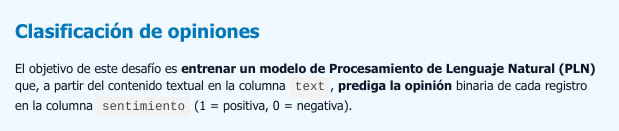

In [110]:
import pandas as pd
df = pd.read_csv('dataset_train_95.csv')

df.head()

,id,autor,declaracion,etiqueta,palabras_clave,tweet,respuesta_mayoria_5_etiquetas,respuesta_mayoria_3_etiquetas
0,116196,Ciara O'Rourke,CDC just cancelled Halloween for kids.,0,"CDC, cancelled, Halloween",If the CDC wants people to not crowd and party...,Agree,Agree
1,118599,Ciara O'Rourke,Coroner saying George Floyd died of drug overd...,0,"George Floyd, died, drug overdose",@GlennLoury George Floyd died of a drug overdo...,NO MAJORITY,Agree
2,133975,Tom Kertscher,Says Nancy Pelosi made millions in coronavirus...,0,"pelosi, made millions, insider trading",@hrkbenowen Pelosis husband who made via insid...,Agree,Agree
3,92314,Caryn Shinske,"New Jersey has ""the highest property taxes in ...",1,"New Jersey, highest property taxes",@POTUS I'll believe it when I see it...I work ...,Mostly Agree,Agree
4,72507,Louis Jacobson,"""Nearly 6 out of 10 believe that money and wea...",1,"money, more evenly distributed",@1913endedUSA @cindiph94423981 @dbartgallery @...,Agree,Agree


In [111]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81591 entries, 0 to 81590
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             81591 non-null  int64 
 1   autor                          81591 non-null  object
 2   declaracion                    81591 non-null  object
 3   etiqueta                       81591 non-null  int64 
 4   palabras_clave                 81591 non-null  object
 5   tweet                          81591 non-null  object
 6   respuesta_mayoria_5_etiquetas  81591 non-null  object
 7   respuesta_mayoria_3_etiquetas  81591 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.0+ MB


,0
id,0
autor,0
declaracion,0
etiqueta,0
palabras_clave,0
tweet,0
respuesta_mayoria_5_etiquetas,0
respuesta_mayoria_3_etiquetas,0


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['autor'] + df['declaracion'] + df['palabras_clave'] + df['tweet'] + df['respuesta_mayoria_5_etiquetas'] + df['respuesta_mayoria_3_etiquetas'], df['etiqueta'], test_size=0.10)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador = CountVectorizer()
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

In [114]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train_vec, y_train)

LogisticRegression()

In [115]:
df_test = pd.read_csv('dataset_test_5_sin_etiqueta.csv')
df_test.isnull().sum()

,0
id,0
autor,0
declaracion,0
palabras_clave,0
tweet,0
respuesta_mayoria_5_etiquetas,0
respuesta_mayoria_3_etiquetas,0


In [116]:
nueva = df_test['autor'] + df_test['declaracion'] + df_test['palabras_clave'] + df_test['tweet'] + df_test['respuesta_mayoria_5_etiquetas'] + df_test['respuesta_mayoria_3_etiquetas']
X_nueva = vectorizador.transform(nueva)
predict = modelo.predict(X_nueva)

df_test['etiqueta'] = predict

output = pd.DataFrame({'ID': df_test['id'], 'etiqueta': predict})
output.to_csv('submission22.csv', index=False)